In [52]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits=load_digits()

In [53]:
print("Image data shape",digits.data.shape)
print("label data shape",digits.target.shape)

Image data shape (1797, 64)
label data shape (1797,)


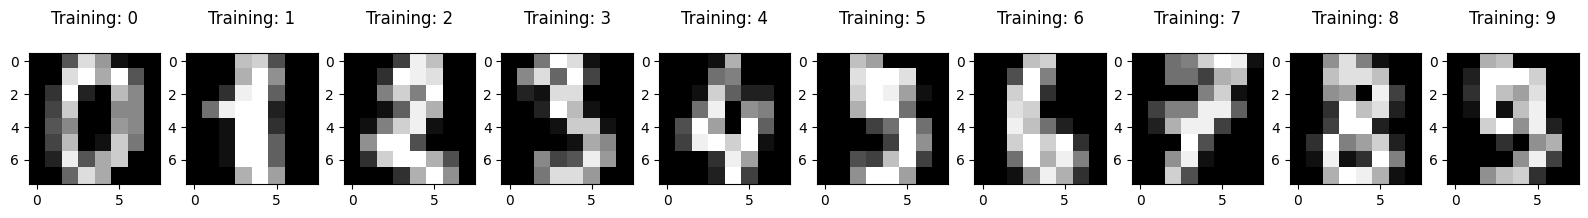

In [54]:
plt.figure(figsize=(20,4))
for index,(Image,label) in enumerate(zip(digits.data[0:10],digits.target[0:10])):
    plt.subplot(1,10,index+1)
    plt.imshow(np.reshape(Image,(8,8)),cmap=plt.cm.gray)
    plt.title("Training: %i\n" %label,fontsize=12)

In [55]:
#splitting digits into trainig set and testing set
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.23,random_state=2)

In [56]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1383, 64)
(1383,)
(414, 64)
(414,)


In [57]:
from sklearn.linear_model import LogisticRegression
logisticrgr=LogisticRegression()
logisticrgr.fit(x_train,y_train)

c:\Users\nirob\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
print(logisticrgr.predict(x_test[0].reshape(1,-1)))

[4]


In [59]:
logisticrgr.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [60]:
predictions=logisticrgr.predict(x_test)

In [61]:
score=logisticrgr.score(x_test,y_test)
print(score)

0.9516908212560387


In [62]:
#genarate confusion metrics
cm=metrics.confusion_matrix(y_test,predictions)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


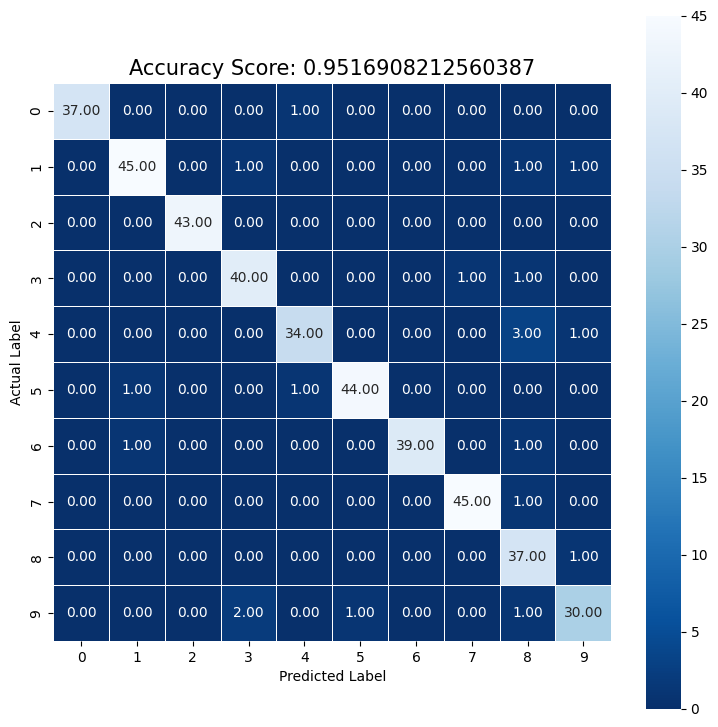

In [63]:
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt=".2f",linewidths=0.5,square=True,cmap="Blues_r");
plt.ylabel("Actual Label");
plt.xlabel("Predicted Label");
all_sample_title="Accuracy Score: {0}".format(score)
plt.title(all_sample_title,size=15);

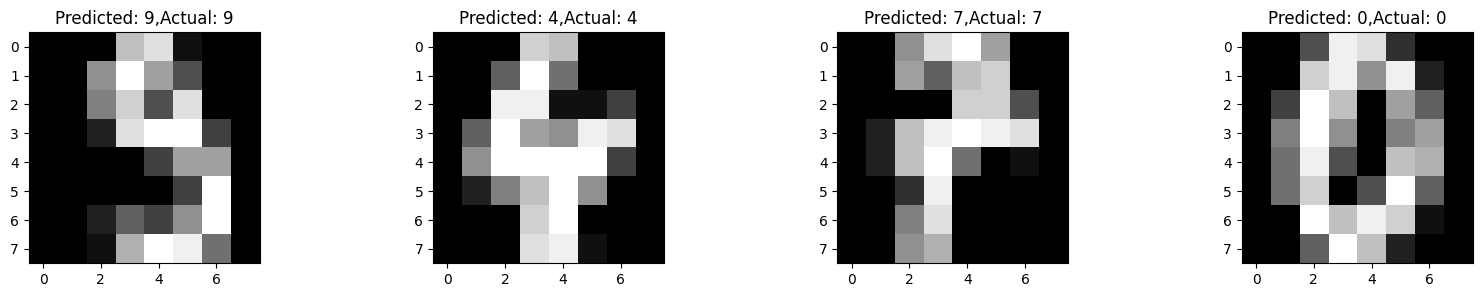

In [64]:
index=0
classifiedIndex=[]
for predict,Actual in zip(predictions,y_test):
    if predict==Actual:
        classifiedIndex.append(index)
    index+=1
plt.figure(figsize=(20,3))
for plotIndex,wrong in enumerate(classifiedIndex[100:104]):
    plt.subplot(1,4,plotIndex+1)
    plt.imshow(np.reshape(x_test[wrong],(8,8)),cmap=plt.cm.gray)
    plt.title("Predicted: {},Actual: {}".format(predictions[wrong],y_test[wrong]))